## Tarea Práctica 1
### Álgebra Lineal y Optimización para Data Science 2023/2

#### Integrantes: Sebastián Dinator, Joaquín Olivares, Benjamín Valdés.

### Ejercicio 3)

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch Glass Identification dataset
glass_identification = fetch_ucirepo(id=42)

# Extract features and targets
X = glass_identification.data.features
y = glass_identification.data.targets

# Explorar el conjunto de datos (opcional)
import pandas as pd
df = pd.DataFrame(data=X, columns=glass_identification.data.feature_names)
df['Target'] = y
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


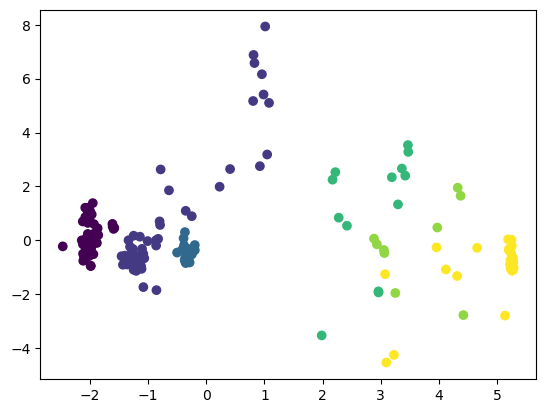

In [3]:
# Aplicar PCA para reducir la dimensionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Visualizar los datos
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y.values.ravel())
plt.show()

#### Ejercicio 3B)

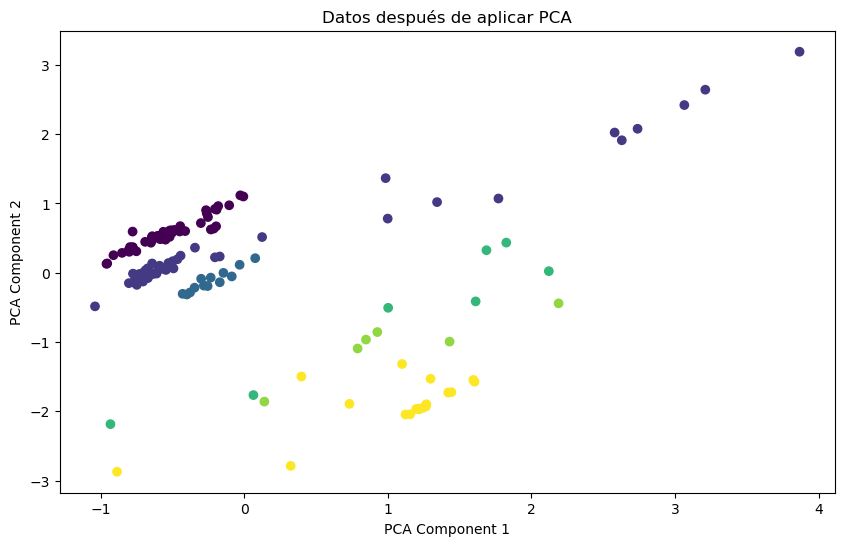

c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sebad\AppData\Local\Temp\ipykernel_106004\1960858959.py:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[class_mask, 0], X_train_pca[class_mask, 1], c=class_colors[class_label], label=f'Class {class_label}')


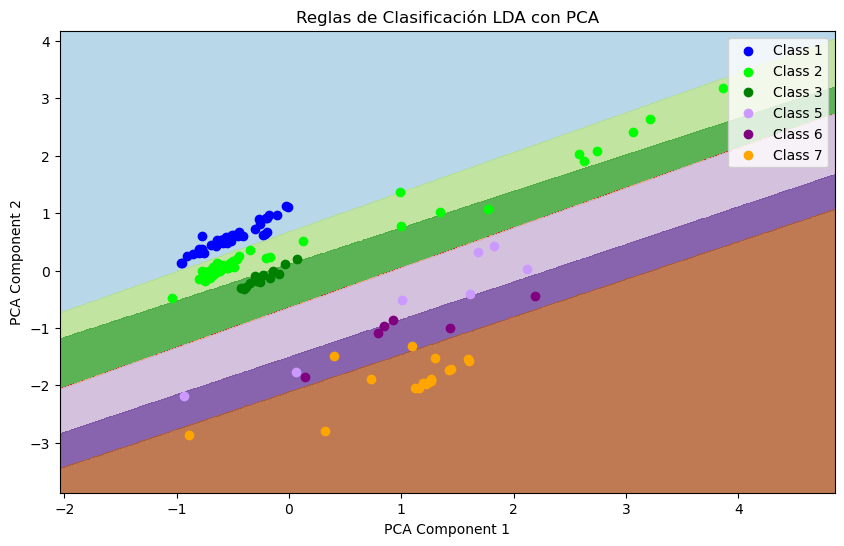

Precisión del modelo LDA: 0.9384615384615385
Matriz de Confusión para LDA:
 [[19  0  0  0  0  0]
 [ 0 21  2  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  5  1  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0 10]]


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Tamaño de prueba 30% del conjunto de datos

# Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Graficar los datos después de aplicar PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train['Type_of_glass'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Datos después de aplicar PCA')
plt.show()

# Entrenar el modelo LDA con PCA
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_train_pca, y_train)

# Predecir etiquetas de clase para el conjunto de prueba
y_pred_lda = lda_pca.predict(X_test_pca)

# Calcular precisión y matriz de confusión para LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Visualización de las regiones de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = lda_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Mapear colores para las clases
class_colors = {1: 'blue', 2: (0.0, 1.0, 0.0), 3: 'green', 5: (0.8, 0.6, 1.0), 6: 'purple', 7: 'orange'}

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Dibujar puntos con colores consistentes
unique_classes = np.unique(y_train)
for class_label in unique_classes:
    class_mask = (y_train['Type_of_glass'] == class_label)
    plt.scatter(X_train_pca[class_mask, 0], X_train_pca[class_mask, 1], c=class_colors[class_label], label=f'Class {class_label}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Reglas de Clasificación LDA con PCA')
plt.legend()
plt.show()

# Imprimir métricas para LDA
print("Precisión del modelo LDA:", accuracy_lda)
print("Matriz de Confusión para LDA:\n", confusion_matrix_lda)


La precisión del modelo LDA es aproximadamente de un 93.8% de las clasificaciones de nuestro conjunto de prueba.

#### Ejercicio 3C)

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_gmm = 0
# Al parecer hay un bug con el tiempo de ejecución de GMM, por lo que se debe ejecutar varias veces hasta que funcione
# No afecta a los cálculos porque no se sobreescribe ninguna variable
while accuracy_gmm == 0:
    # Entrenar el modelo de Gaussian Mixture
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X_train)

    # Predecir etiquetas de clase para el conjunto de prueba
    y_pred_gmm = gmm.predict(X_test)

    # Calcular precisión y matriz de confusión para GMM
    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
    confusion_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)

# Imprimir métricas para GMM
print("Precisión del modelo GMM:", accuracy_gmm)
print("Matriz de Confusión para GMM:\n", confusion_matrix_gmm)

Precisión del modelo GMM: 0.2923076923076923
Matriz de Confusión para GMM:
 [[ 0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0]
 [ 5 18  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]]


c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


La precisión del modelo GMM es mucho más baja que la de LDA, con aproximadamente un 29.2%. Se predijo sólo una clase de todas las muestras del conjunto de prueba, por lo que se puede asumir que no pudo capturar la estructura de los datos correctamente.

Los resultados de LDA son mucho mejores que los de GMM, ya que LDA es un modelo de clasificación lineal, mientras que GMM es un modelo de clasificación no lineal. Por lo tanto, LDA es capaz de capturar la estructura de los datos, mientras que GMM no.

#### Ejercicio 3D)

c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicciones con LDA para 10 nuevas observaciones: [3 2 3 3 2 3 2 3 2 2]
Predicciones con GMM para 10 nuevas observaciones: [0 0 0 0 0 1 0 0 1 0]


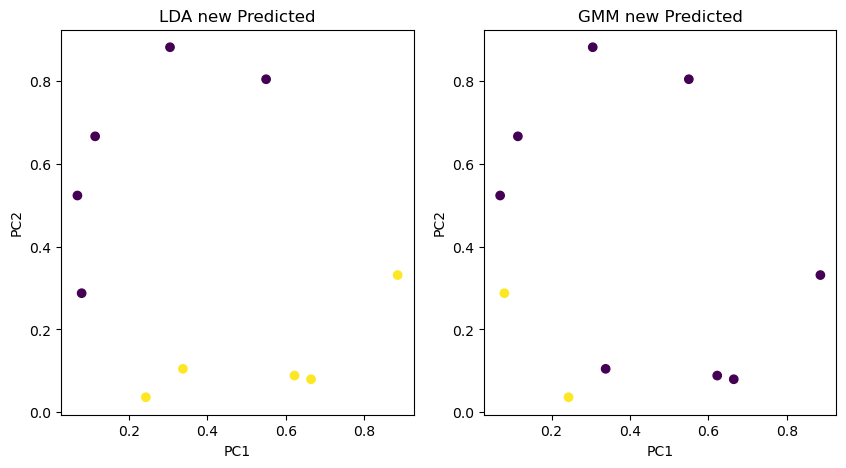

In [20]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definir objeto LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Generar 10 nuevas observaciones de prueba (cambiar según tus necesidades)
new_samples = np.random.rand(10, X.shape[1])

# Clasificar con LDA
y_new_pred_lda = lda.predict(new_samples)

# Clasificar con GMM
y_new_pred_gmm = gmm.predict(new_samples)

# Imprimir las predicciones
print("Predicciones con LDA para 10 nuevas observaciones:", y_new_pred_lda)
print("Predicciones con GMM para 10 nuevas observaciones:", y_new_pred_gmm)

# Graficar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("LDA new Predicted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(new_samples[:,0], new_samples[:,1], c=y_new_pred_lda)
plt.subplot(1,2,2)
plt.title("GMM new Predicted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(new_samples[:,0], new_samples[:,1], c=y_new_pred_gmm)
plt.show()

Tanto el modelo LDA como GMM asignan la misma etiqueta a todas las observaciones nuevas, por lo que se puede apreciar que ambos modelos no son capaces de clasificar correctamente las observaciones nuevas. Esto puede deberse a que los modelos no son capaces de capturar la estructura de los datos, o que los datos no son linealmente separables.